In [1]:
import pandas as pd
from sklearn import tree
import numpy as np
from sklearn.metrics import accuracy_score ,classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [2]:
data=pd.read_csv("dt-data.txt", sep=" ", header=None)
data.columns=['index','occupied','prices','music','location','VIP','favorite beer','Enjoy']
data=data[1:]
data=data.drop('index',axis=1)
data['occupied']=data['occupied'].str.replace(',','')
data['prices']=data['prices'].str.replace(',','')
data['music']=data['music'].str.replace(',','')
data['location']=data['location'].str.replace(',','')
data['VIP']=data['VIP'].str.replace(',','')
data['favorite beer']=data['favorite beer'].str.replace(',','')
data['Enjoy']=data['Enjoy'].str.replace(';','')


#data=data.sample(frac=1).reset_index(drop=True)
data
#trainingData=data[0:15]


,occupied,prices,music,location,VIP,favorite beer,Enjoy
1,High,Expensive,Loud,Talpiot,No,No,No
2,High,Expensive,Loud,City-Center,Yes,No,Yes
3,Moderate,Normal,Quiet,City-Center,No,Yes,Yes
4,Moderate,Expensive,Quiet,German-Colony,No,No,No
5,Moderate,Expensive,Quiet,German-Colony,Yes,Yes,Yes
6,Moderate,Normal,Quiet,Ein-Karem,No,No,Yes
7,Low,Normal,Quiet,Ein-Karem,No,No,No
8,Moderate,Cheap,Loud,Mahane-Yehuda,No,No,Yes
9,High,Expensive,Loud,City-Center,Yes,Yes,Yes
10,Low,Cheap,Quiet,City-Center,No,No,No


In [3]:
le=preprocessing.LabelEncoder()
data['Enjoy']=le.fit_transform(data['Enjoy'])
data['occupied']=le.fit_transform(data['occupied'])
data['prices']=le.fit_transform(data['prices'])
data['music']=le.fit_transform(data['music'])
data['VIP']=le.fit_transform(data['VIP'])
data['favorite beer']=le.fit_transform(data['favorite beer'])
data['location']=le.fit_transform(data['location'])
training_data=data.iloc[:,0:len(data.columns)-1]
test_data=data.iloc[:,-1]
print(training_data)

    occupied  prices  music  location  VIP  favorite beer
1          0       1      0         4    0              0
2          0       1      0         0    1              0
3          2       2      1         0    0              1
4          2       1      1         2    0              0
5          2       1      1         2    1              1
6          2       2      1         1    0              0
7          1       2      1         1    0              0
8          2       0      0         3    0              0
9          0       1      0         0    1              1
10         1       0      1         0    0              0
11         2       0      0         4    0              1
12         1       0      1         4    1              1
13         2       1      1         3    0              1
14         0       2      0         3    1              1
15         2       2      0         1    0              1
16         0       2      1         2    0              0
17         0  

In [4]:
test_data

1     0
2     1
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    0
11    0
12    0
13    1
14    1
15    1
16    0
17    1
18    0
19    0
20    1
21    1
Name: Enjoy, dtype: int64

In [5]:
x_train,x_test, y_train, y_test=train_test_split(training_data, test_data,test_size=0.20, random_state=100)

In [6]:
x_train

,occupied,prices,music,location,VIP,favorite beer
7,1,2,1,1,0,0
1,0,1,0,4,0,0
2,0,1,0,0,1,0
10,1,0,1,0,0,0
18,1,2,1,0,0,0
13,2,1,1,3,0,1
6,2,2,1,1,0,0
3,2,2,1,0,0,1
5,2,1,1,2,1,1
15,2,2,0,1,0,1


In [7]:
y_train

7     0
1     0
2     1
10    0
18    0
13    1
6     1
3     1
5     1
15    1
11    0
17    1
16    0
8     1
4     0
9     1
Name: Enjoy, dtype: int64

In [8]:
x_test

,occupied,prices,music,location,VIP,favorite beer
19,1,1,0,3,0,0
21,1,2,1,0,0,0
12,1,0,1,4,1,1
20,2,2,1,4,0,0
14,0,2,0,3,1,1


In [9]:
clf=tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
clf=clf.fit(x_train, y_train)

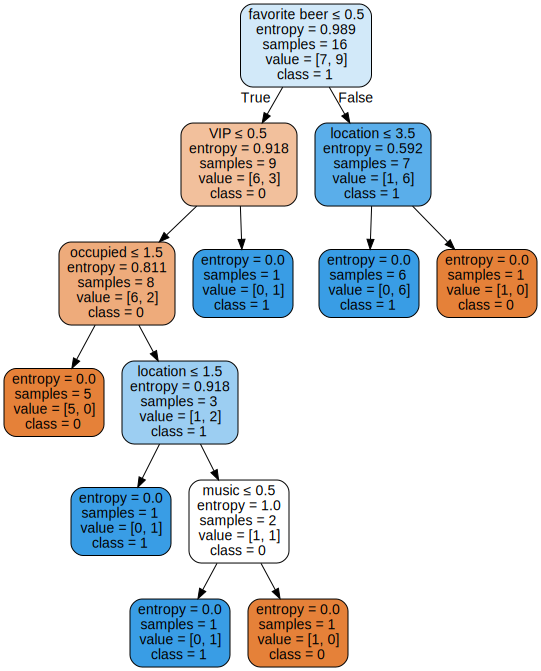

In [10]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=x_train.columns,  
                         class_names=['0','1'],  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph

In [11]:
(clf.predict(x_train)==y_train).all()

True

In [12]:
x_test

,occupied,prices,music,location,VIP,favorite beer
19,1,1,0,3,0,0
21,1,2,1,0,0,0
12,1,0,1,4,1,1
20,2,2,1,4,0,0
14,0,2,0,3,1,1


In [13]:
x_test.columns

Index(['occupied', 'prices', 'music', 'location', 'VIP', 'favorite beer'], dtype='object')

In [14]:
y_test

19    0
21    1
12    0
20    1
14    1
Name: Enjoy, dtype: int64

In [15]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 1], dtype=int64)

In [16]:
accuracy_score(y_test,y_pred)*100

60.0

In [17]:
test_data=pd.DataFrame(data=[[2,0,0,0,0,1]],columns=['occupied', 'prices', 'music', 'location', 'VIP', 'favorite beer'])
test_data
clf.predict(test_data)

array([1], dtype=int64)